In [1]:
import numpy as np

1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [2]:
def converter(n: int):
  powers_of_2 = [x for x in range(1, n+1) if np.log2(x)%1==0]

  bin_form = ''
  for i, p in enumerate(powers_of_2):
    bin_form = str((n >> i) & 0b1) + bin_form
  

  powers_of_2.reverse()
  dec_form = 0
  for d, p in zip(bin_form, powers_of_2):
    dec_form += int(d) * p

  hex_values = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']

  powers_of_2.reverse()
  hex_form = ''
  for i in range(0, powers_of_2.__len__(), 4):
    s = 0
    for j in range(4):
      s += ((n >> i + j) & 0b1) * powers_of_2[(i+j)%4]
    hex_form = hex_values[s] + hex_form

  print(f"Binary format: {bin_form}")
  print(f"Decimal format: {dec_form}")
  print(f"Hexadecimal format: {hex_form}")


  

converter(42)

Binary format: 101010
Decimal format: 42
Hexadecimal format: 2A


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [3]:
def float_interpreter(n):
  
  mantissa = n & 0x3FFFFF
  exponent = (n >> 23) & 0xFF
  sign = (n >> 31) & 0x1

  result = 1

  for i in range(1, 24):
    result += ((mantissa >> 23 - i) & 0b1) * pow(2, -i)


  result *= pow(-1, sign) * pow(2, exponent - 127)
  print(result)

number = 0b11000000101100000000000000000000
number = 124792759302
float_interpreter(number)

2.2974429591341104e-30


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [4]:
lower, upper = 1, 1

while lower > 0:
  lower /= 2

  # print(lower)
  
# there isn't an upper limit

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [5]:
x = 1

x_old = x
x += 0.5

i = 1

while x_old < x:
  
  x_old = x
  x += pow(2, -i)
  i+= 1

  print(x, x_old)

print(f"Machine precision is up to 2^({-i})")

2.0 1.5
2.25 2.0
2.375 2.25
2.4375 2.375
2.46875 2.4375
2.484375 2.46875
2.4921875 2.484375
2.49609375 2.4921875
2.498046875 2.49609375
2.4990234375 2.498046875
2.49951171875 2.4990234375
2.499755859375 2.49951171875
2.4998779296875 2.499755859375
2.49993896484375 2.4998779296875
2.499969482421875 2.49993896484375
2.4999847412109375 2.499969482421875
2.4999923706054688 2.4999847412109375
2.4999961853027344 2.4999923706054688
2.499998092651367 2.4999961853027344
2.4999990463256836 2.499998092651367
2.499999523162842 2.4999990463256836
2.499999761581421 2.499999523162842
2.4999998807907104 2.499999761581421
2.4999999403953552 2.4999998807907104
2.4999999701976776 2.4999999403953552
2.499999985098839 2.4999999701976776
2.4999999925494194 2.499999985098839
2.4999999962747097 2.4999999925494194
2.499999998137355 2.4999999962747097
2.4999999990686774 2.499999998137355
2.4999999995343387 2.4999999990686774
2.4999999997671694 2.4999999995343387
2.4999999998835847 2.4999999997671694
2.499999999

5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [6]:
a = 0.001
b = 1000
c = 0.001

In [7]:
a = 0.001
b = 1000
c = 0.001

a = a + np.random.uniform(0, a/1000)
b = b + np.random.uniform(0, b/1000)
c = c + np.random.uniform(0, c/1000)



def quadratic_equation_solver_a(a, b, c):
  x1 = (-b + np.sqrt(b**2 - 4 * a * c)) / (2 * a)
  x2 = (-b - np.sqrt(b**2 - 4 * a * c)) / (2 * a)

  return x1, x2

print(quadratic_equation_solver_a(a, b, c))

(np.float64(-1.000344559614281e-06), np.float64(-1000279.3426212303))


In [8]:
a = 0.001
b = 1000
c = 0.001

a = a + np.random.uniform(0, a/1000)
b = b + np.random.uniform(0, b/1000)
c = c + np.random.uniform(0, c/1000)

def quadratic_equation_solver_b(a, b, c):
  x1 = (4 * a * c) / (2 * a * (-b - np.sqrt(b**2 - 4 * a * c)))
  x2 = (4 * a * c) / (2 * a * (-b + np.sqrt(b**2 - 4 * a * c)))

  return x1, x2

print(quadratic_equation_solver_b(a, b, c))

(np.float64(-1.0000643862469378e-06), np.float64(-999742.8322240605))


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [ ]:
def func(x: float) -> float:
  return x * (x - 1)

In [11]:
def derivative(x: float, delta: float, f) -> float:
  der = (f(x + delta) - f(x)) / delta
  return der

In [15]:
def analytical_derivative(x: float):
  return 2 * x - 1

In [21]:
# a
x = 1
delta = pow(10, -2)

ana_der = analytical_derivative(x)

print(derivative(x, delta, func))
print(ana_der)

1.010000000000001
1


In [27]:
# b

errors = []
for i in range(4, 15, 2):
  delta = pow(10, -i)
  der = derivative(x, delta, func)
  errors.append(der - ana_der)

print(errors)

[9.999999988985486e-05, 9.99917733279787e-07, 3.922528746258536e-09, 8.284037100736441e-08, 8.890058334132256e-05, -0.0007992778373491216]


/tmp/ipykernel_10557/921071929.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


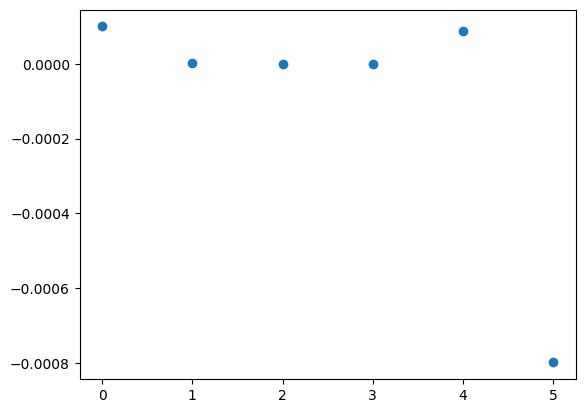

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(range(errors.__len__()), errors)

fig.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [36]:
def semicircle(x: float):
  return np.sqrt(1 - x**2)

In [52]:
# a
def riemann_integral(x1: float, x2: float, n: int, f):
  step = (x2 - x1) / n
  
  s = 0
  for i in range(n):
    y = f(x1 + step * i)
    s += y
    

  s *= step
  return s

In [59]:
n = 10000000
x1, x2 = -1, 1

#print(semicircle(-0.9))

area = riemann_integral(x1, x2, n, semicircle)
print(area)

1.570796326742408
